In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd
from utils import gradient_descent, sigmoid, plot_logreg_line, compute_cost


# Part 1 ~ College admittance decision
Logistic regression with gradient decent 

In [12]:
# ~ A ~ #
Xdata = pd.read_csv("data\\admittance_data.csv")
data = Xdata.to_numpy()
X_orig = data[:,0:2]
y = data[:,2]
m = y.size

X_orig is the feature matrix - each row represents one student grades

y - the corresponding label ---> 1- admitted, 0 - not admitted

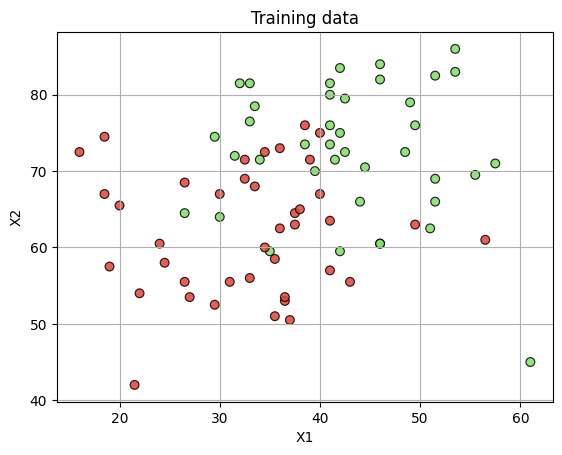

In [13]:
# ~ B ~ #
x1 = X_orig[:,0]
x2 = X_orig[:,1]

colors = ['#e34234' if yi==0 else '#80df66' for yi in y]
plt.scatter(x1, x2, c=colors, s=40, edgecolors='k', linewidths=0.85, alpha=0.85)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Training data')
plt.grid()
plt.show()

In [14]:
# ~ C ~ #
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ #
## you can see the functions code at utils.py  ##
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ # 

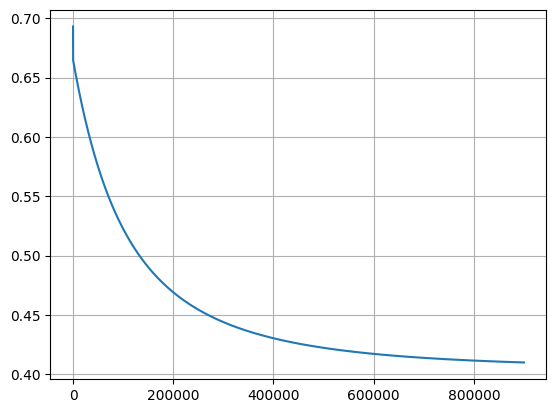

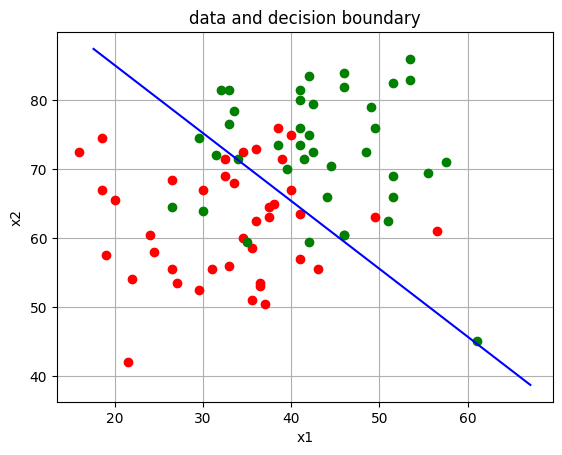

In [15]:
# ~ D ~ #
onesvec = np.ones((m ,1))
X = np.concatenate((onesvec, X_orig), axis = 1)
n = X.shape[1]
theta = np.zeros((n,1))
y = y.reshape([y.shape[0], 1])
J, grad_J = compute_cost(X, y, theta)
alpha = 0.0013
num_iters = 900000
theta, J_iter =  gradient_descent(X, y, theta, alpha, num_iters)
plt.plot(J_iter)
plt.grid()
plt.show()
plot_logreg_line(X, y, theta)


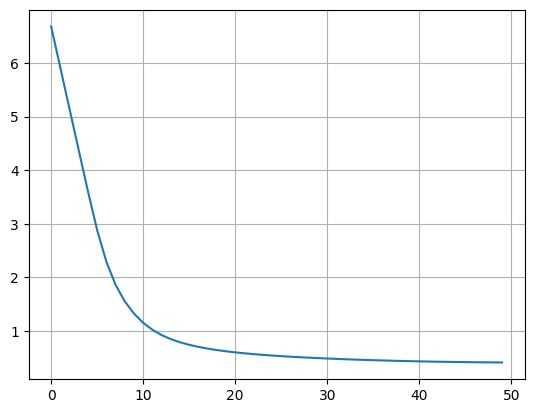

In [16]:
# ~ E ~ #
# noirmalize the data befor training
def feature_normalize(X):
    """ Normalize vector X, return X"""
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm

onesvec = np.ones((m ,1))
X1= feature_normalize(X_orig[:,0].reshape(-1,1))
X2= feature_normalize(X_orig[:,1].reshape(-1,1))

X_normalized_temp = np.concatenate((onesvec, X1), axis = 1)
X_normalized = np.concatenate((X_normalized_temp, X2), axis = 1)
 
n = X_normalized.shape[1]
theta_n = np.zeros((n,1))
y = y.reshape([y.shape[0], 1])
J, grad_J = compute_cost(X_normalized, y, theta)
alpha = 1.98
num_iters = 50 # extremely small number of iterations
theta_n, J_iter_n =  gradient_descent(X_normalized, y, theta, alpha, num_iters)
plt.plot(J_iter_n)
plt.grid()
plt.show()

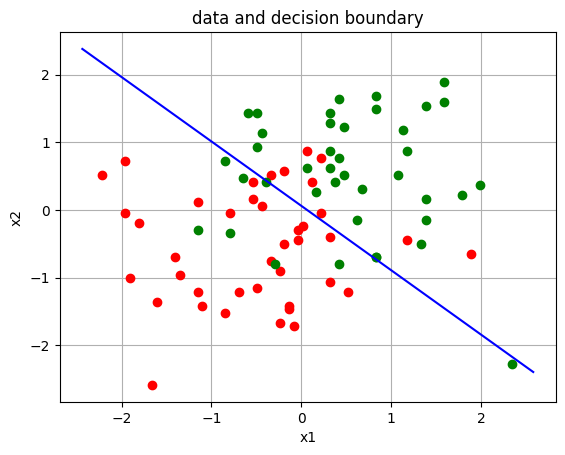

In [17]:
# ~ F ~ #
# decision boundary after normalization
plot_logreg_line(X_normalized, y, theta_n)

Alpha: 1.98, Num Iterations: 100000


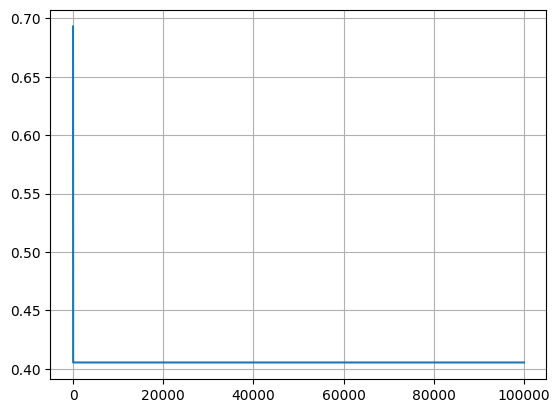

Alpha: 1.98, Num Iterations: 10000


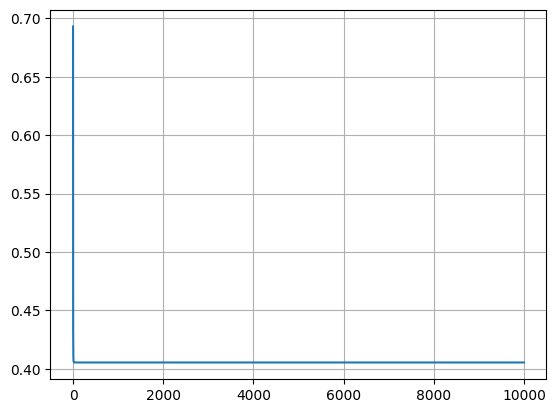

Alpha: 1.98, Num Iterations: 1000


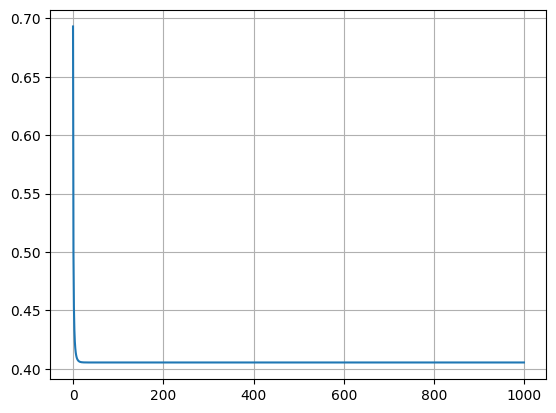

Alpha: 1.98, Num Iterations: 100


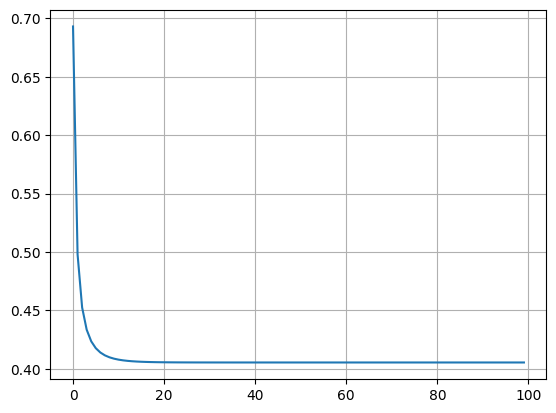

Alpha: 2.3, Num Iterations: 100000


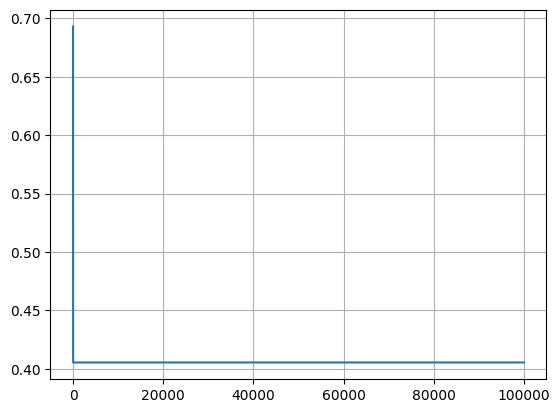

Alpha: 2.3, Num Iterations: 10000


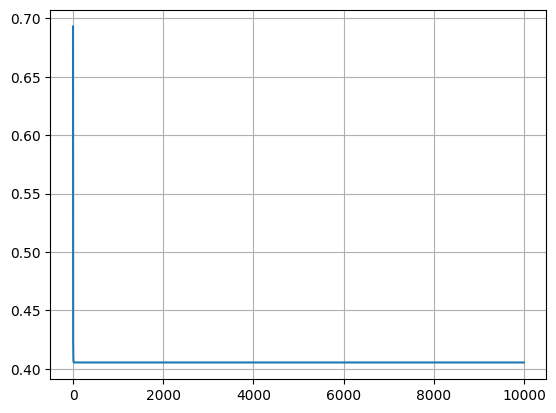

Alpha: 2.3, Num Iterations: 1000


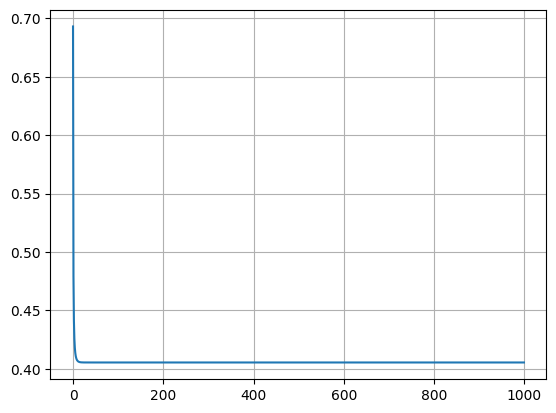

Alpha: 2.3, Num Iterations: 100


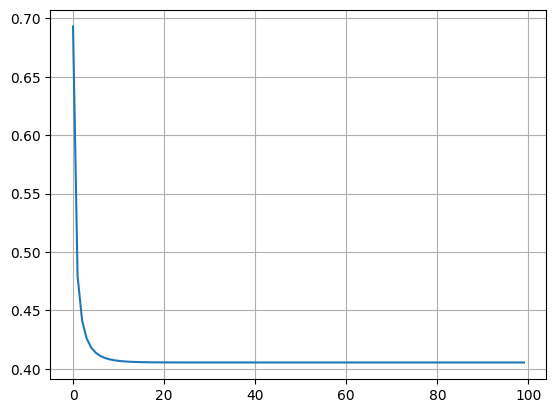

Alpha: 0.8, Num Iterations: 100000


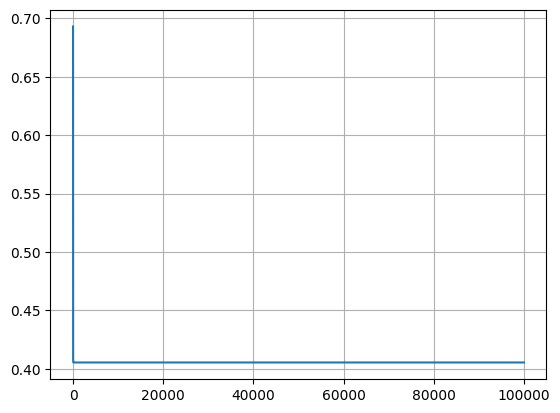

Alpha: 0.8, Num Iterations: 10000


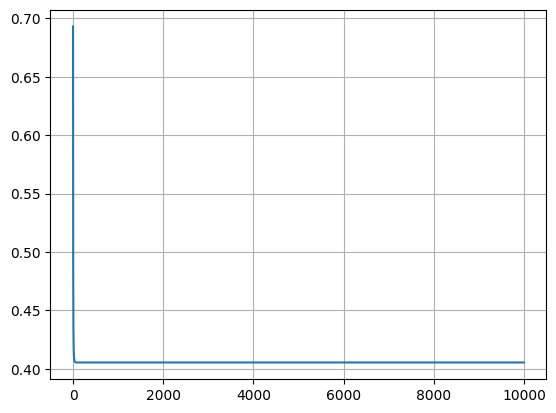

Alpha: 0.8, Num Iterations: 1000


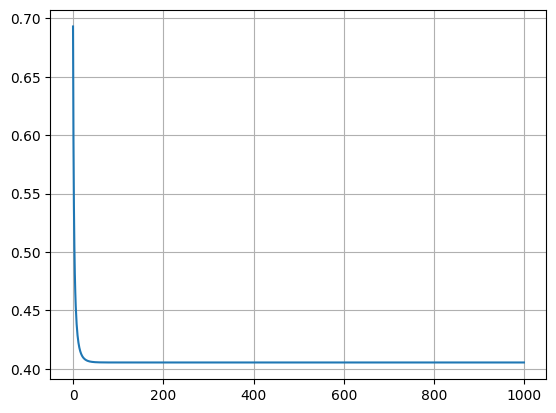

Alpha: 0.8, Num Iterations: 100


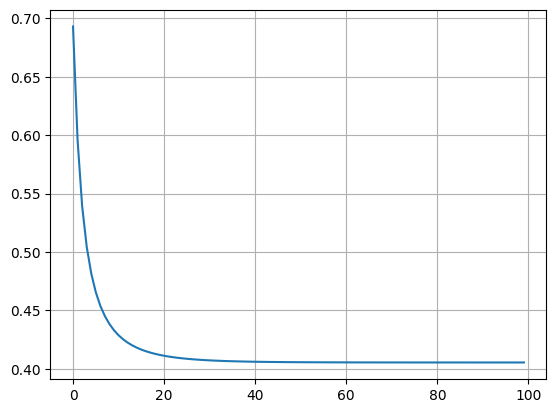

Alpha: 0.1, Num Iterations: 100000


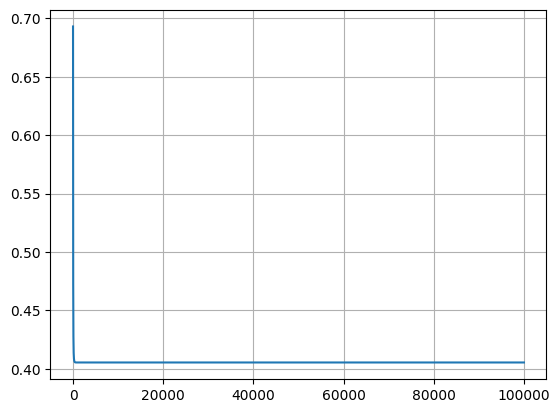

Alpha: 0.1, Num Iterations: 10000


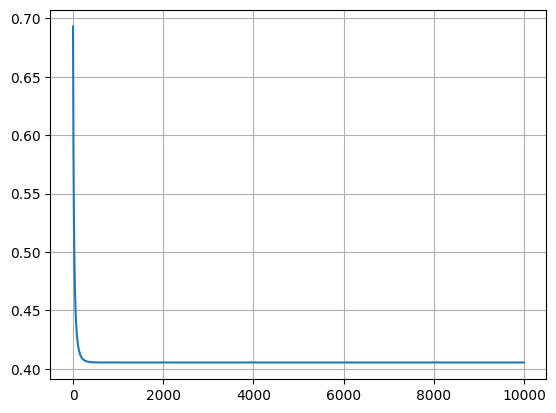

Alpha: 0.1, Num Iterations: 1000


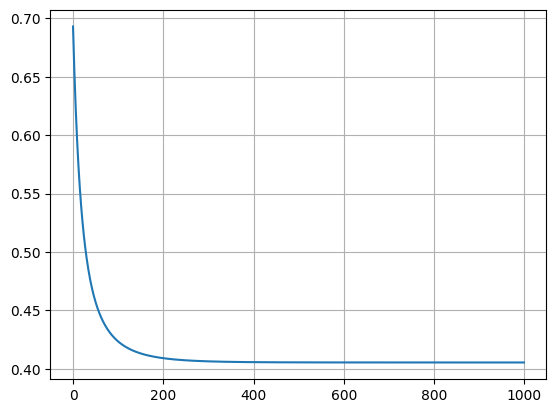

Alpha: 0.1, Num Iterations: 100


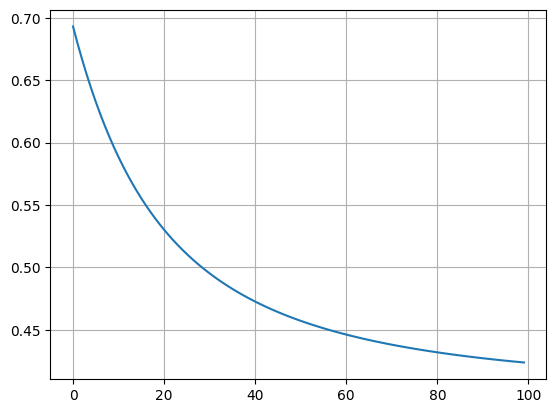

Alpha: 0.01, Num Iterations: 100000


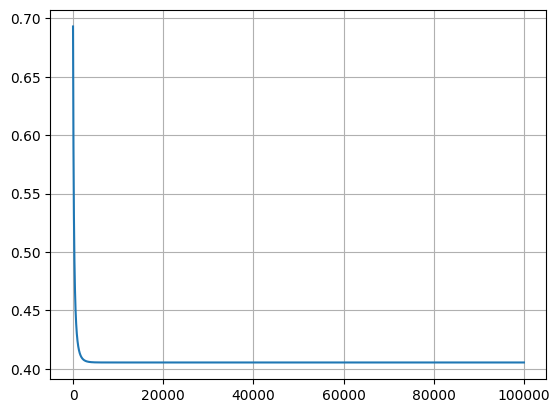

Alpha: 0.01, Num Iterations: 10000


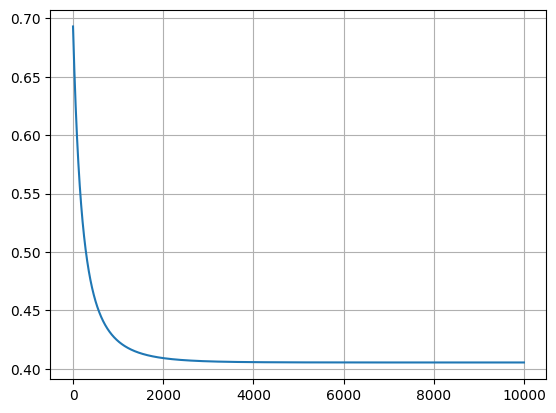

Alpha: 0.01, Num Iterations: 1000


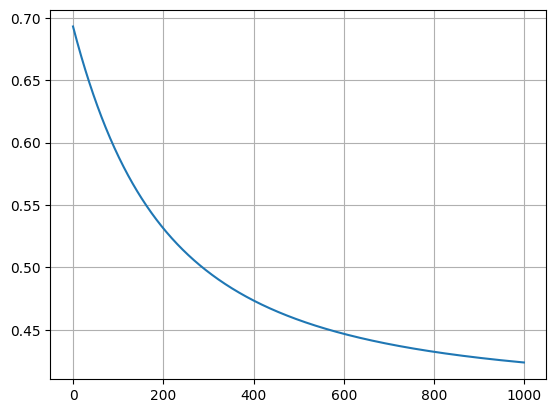

Alpha: 0.01, Num Iterations: 100


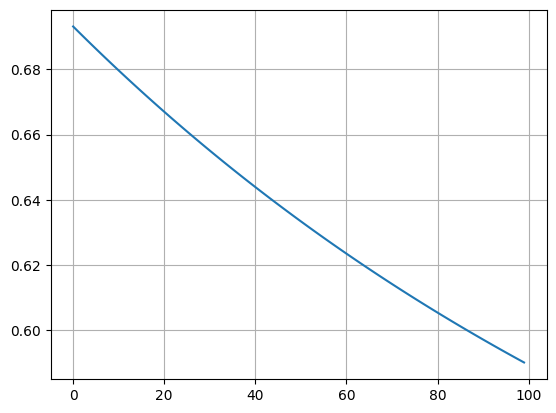

Alpha: 0.001, Num Iterations: 100000


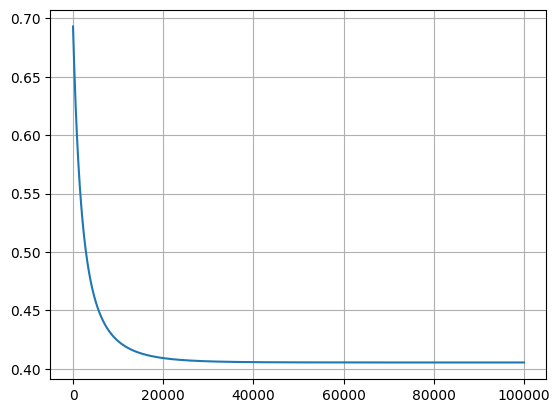

Alpha: 0.001, Num Iterations: 10000


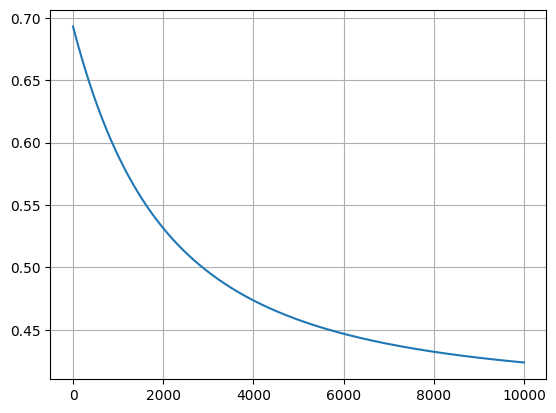

Alpha: 0.001, Num Iterations: 1000


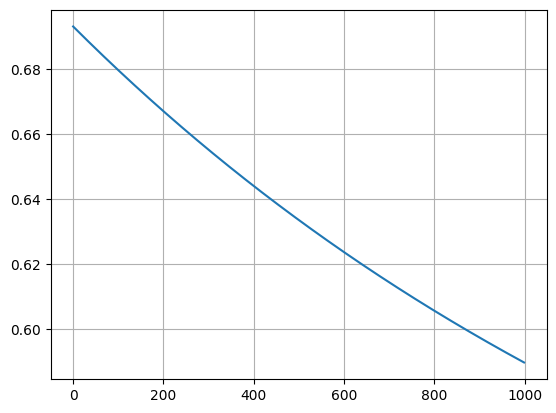

Alpha: 0.001, Num Iterations: 100


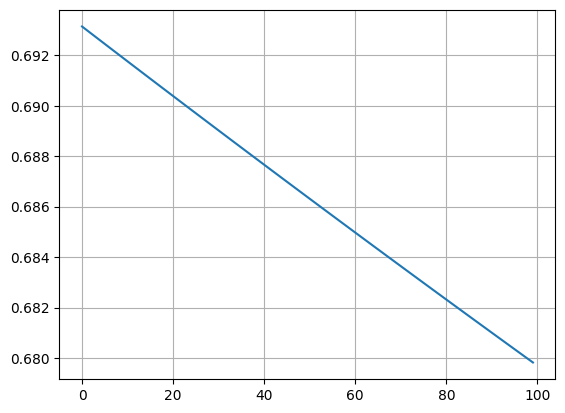

Alpha: 0.0001, Num Iterations: 100000


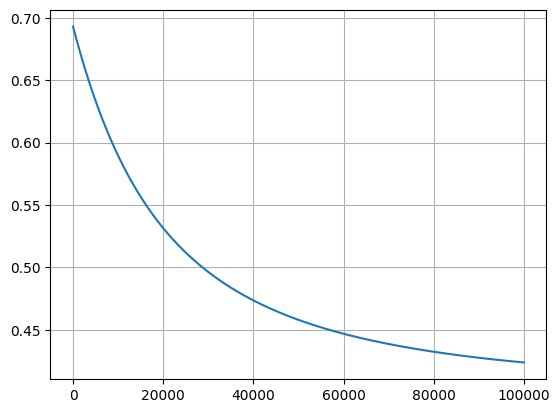

Alpha: 0.0001, Num Iterations: 10000


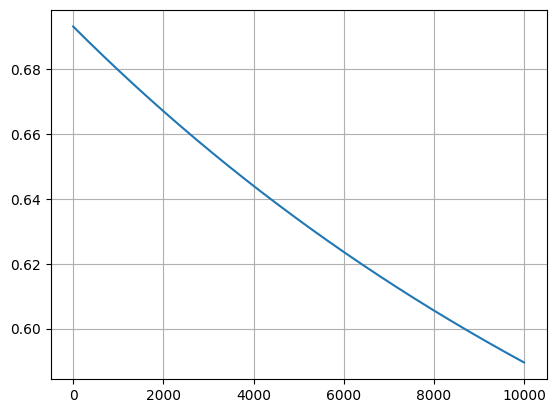

Alpha: 0.0001, Num Iterations: 1000


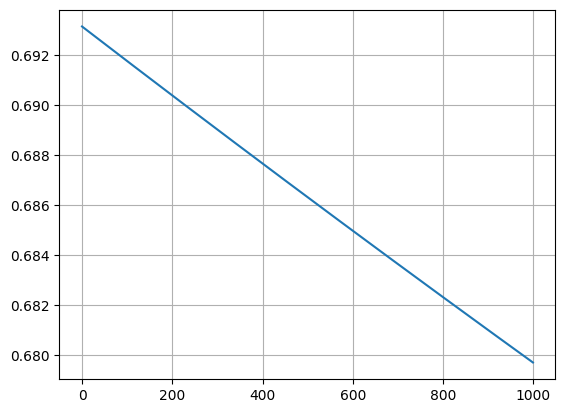

Alpha: 0.0001, Num Iterations: 100


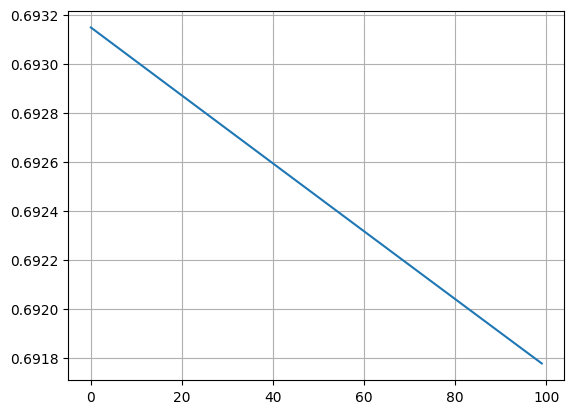

Alpha: 0.007, Num Iterations: 100000


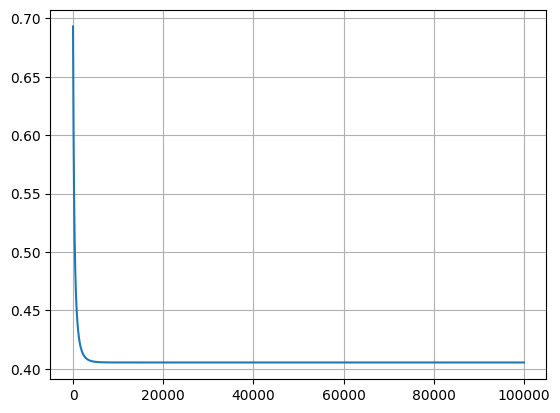

Alpha: 0.007, Num Iterations: 10000


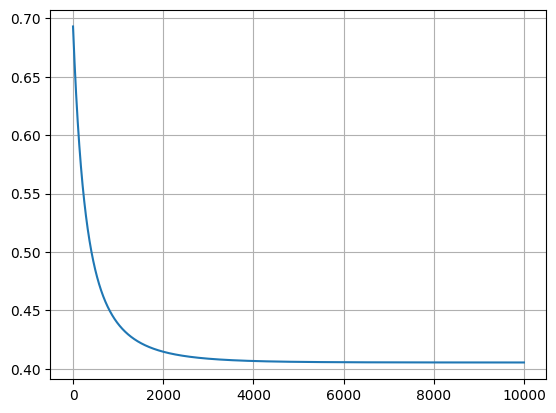

Alpha: 0.007, Num Iterations: 1000


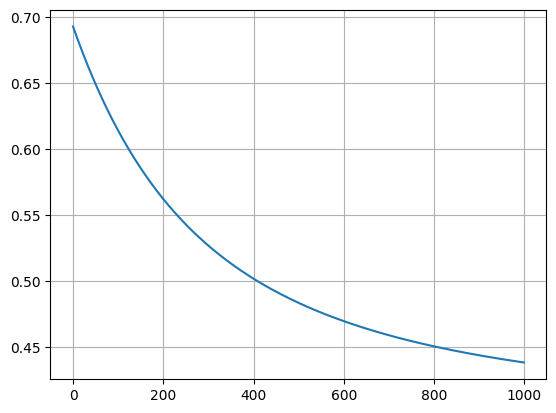

Alpha: 0.007, Num Iterations: 100


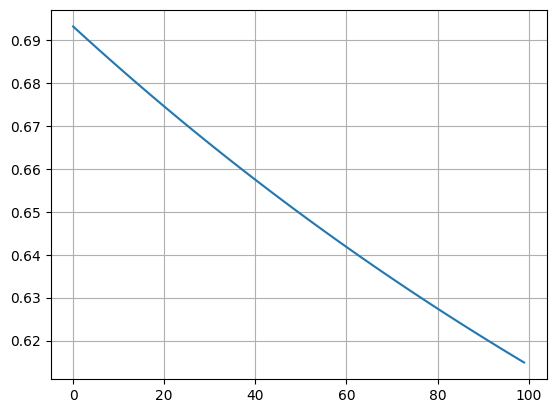

Alpha: 0.001, Num Iterations: 100000


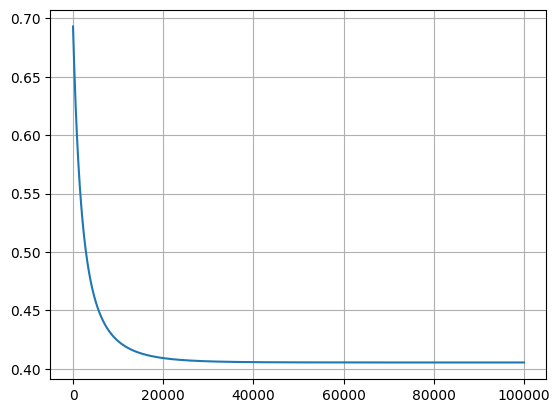

Alpha: 0.001, Num Iterations: 10000


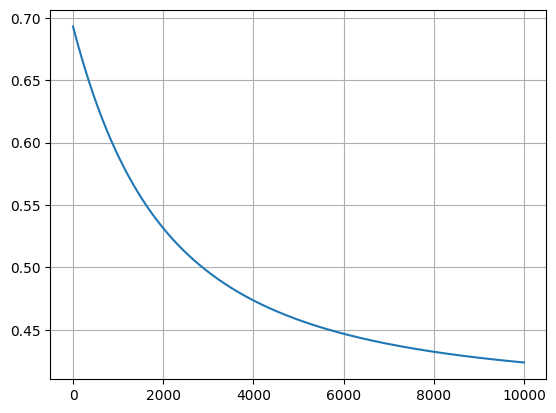

Alpha: 0.001, Num Iterations: 1000


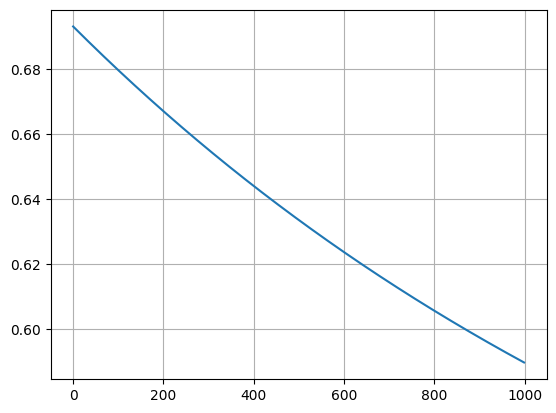

Alpha: 0.001, Num Iterations: 100


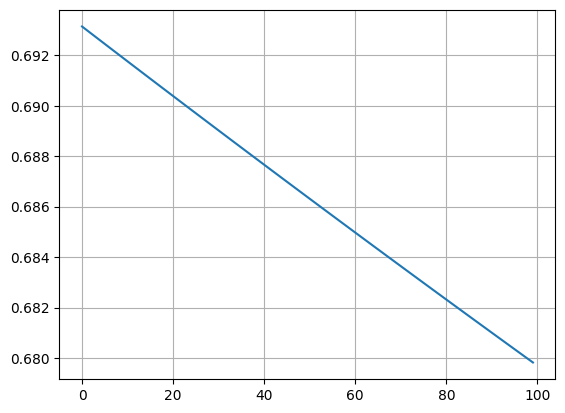

In [18]:
# ~ G ~ #
# search for best hyperparameters - alpha and num_iters
n = X_normalized.shape[1]
theta = np.zeros((n,1))
y = y.reshape([y.shape[0], 1])
J, grad_J = compute_cost(X_normalized, y, theta)
# add a small number to alpha to avoid division by zero
alphas = [1.98, 2.3, 0.8, 0.1, 0.01, 0.001, 0.0001, 7e-3, 1e-3]
num_iters = [10**5, 10**4, 10**3, 10**2]
# loop over different alpha and num_iters
# print out the cost function for each combination

scores = {}
for alpha in alphas:
    for num_iter in num_iters:
        theta = np.zeros((n,1))
        y = y.reshape([y.shape[0], 1])
        J, grad_J = compute_cost(X_normalized, y, theta)
        theta, J_iter =  gradient_descent(X_normalized, y, theta, alpha, num_iter)
        print(f'Alpha: {alpha}, Num Iterations: {num_iter}')
        plt.plot(J_iter)
        plt.grid()
        plt.show()

# the faster the convergence, the better ---> best hyperparameters are alpha = 2.3 and num_iters = 10^2

In [19]:
# ~ H ~ #
def predict_prob(X, theta):
    return sigmoid(X.dot(theta))

def predict_label(X, theta, threshold=0.5):
    return (predict_prob(X, theta) >= threshold).astype(int)

In [20]:
# ~ H ~ #
# un is unnormalized, n is normalized

new_students = np.array([[43, 59], [47, 87], [79, 86], [42, 58]]) # I added more 2 example for make sure 

new_students_un = np.concatenate([np.ones((new_students.shape[0], 1)), new_students],axis=1)
probs_un = sigmoid(new_students_un.dot(theta))

for i, p in enumerate(probs_un, start=1):
    prob = p[0] * 100           
    pred = int(p[0] >= 0.5)     
    print(f"Student #{i} (scores={new_students[i-1]}) → p(admit) = {prob:.2f}% → {pred}")


# with normalization:
mu = np.mean(X_orig, axis=0)
sigma = np.std(X_orig, axis=0)

new_students_n = (new_students - mu) / sigma

new_x = np.concatenate([np.ones((new_students_n.shape[0], 1)), new_students_n], axis=1)
probs_n = sigmoid(new_x.dot(theta_n)) # from part E

print("\n\nNormalized data:\n")
for i, p in enumerate(probs_n, start=1):
    print(f"Student #{i} (scores={new_students[i-1]}) →  p(admit) = {p[0]*100:.2f}% → {(p[0]).round():.0f}")

Student #1 (scores=[43 59]) → p(admit) = 93.41% → 1
Student #2 (scores=[47 87]) → p(admit) = 97.05% → 1
Student #3 (scores=[79 86]) → p(admit) = 98.64% → 1
Student #4 (scores=[42 58]) → p(admit) = 93.09% → 1


Normalized data:

Student #1 (scores=[43 59]) →  p(admit) = 30.92% → 0
Student #2 (scores=[47 87]) →  p(admit) = 99.55% → 1
Student #3 (scores=[79 86]) →  p(admit) = 100.00% → 1
Student #4 (scores=[42 58]) →  p(admit) = 23.43% → 0
